In [ ]:
import umap
import matplotlib.pyplot as plt 
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler 
import pandas as pd 
import numpy as np
import glob
from tqdm import tqdm
import ast
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [22]:
df = pd.read_csv('bigstatsdata_v12')

In [23]:
bin_size = 50
bins = np.arange(2200, df['Elo'].max() + bin_size, bin_size)

In [ ]:


fraud = ['HansOnTwitch',
'kirillshevchenko',
'MaximDlugy',
'DanielNaroditsky',
'Jospem',
'CentrumSakkiskola',
'Arash-Tiger',
'Kiborg95' ,
'PaperLL',
'polina131',
'harley-storm',
'Mr-ChessBeastt',
'matyurasov',
'messi2008',
'mume195',
's1lonmaster',
'LimitlessAntler',
'Theee999',
'GoofyCondor',
'WWYDlIKYRN',
'OOTORIKYOUYA',
 'seriousness',
'Jimzon',
'janvanrun', 
'V-SAMSONOV',
'Rudoziev',
'xcicadax',
'golfn1',
'JustAnotherStoic', 
'pondababa',
'nomoreban',
'RichScene',
      'BlueTreeQ',
      'endgametecnic',
      'FrogTheGm',
      'aline_maulin',
      'Louis_GM',
      'TheFlex',
      'MrGelfand',
      '08zimleoH',
      'Kei_Shibuya',
      'ramtinKKV',
      'SomeKurdboy',
      'intergr',
      '1SClayman',
      'BCstandart',
      'ATLHOU21'
]

good = [
    'MagnusCarlsen',
    'VladimirKramnik',
    'Chefshouse',
    'TheVish',
    'lachesisQ',
    'Firouzja2003',
    'GMWSO',
    'Hikaru',
    'yifan0227',
    'ChessQueen',
    'Juwen',
    'LevonAronian',
    'AnisjGiri',
    'Azerichess',
    'GukeshDommaraju',
    'SergeyKarjakin',
    'FormerProdigy',
    'PSvidler',
    'FabianoCaurano',
    'Bigfish1995',
    'igorkovalenko',
    'GukeshDommaraju',
    'Flawless_Fighter',
    'lili_ani',
    'Polish_fighter3000',
    'Grischuk',
    'JuditPolgar',
    'annamaja',
    'annacramling',
    'DominezOnYoutube'
]

Количество записей в бине 2200-2250 = 504137
Количество фрода в бине 2200-2250 = 0
Найдено аномалий: 0
fr:  0 0.0 0.0
norm:  2 3.967175589175165e-06 0.2222222222222222


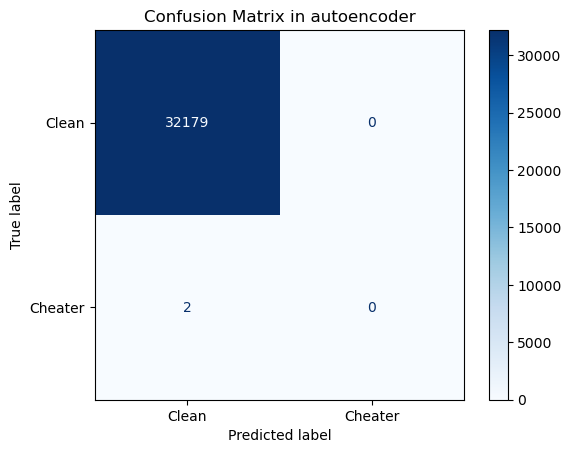

Количество записей в бине 2250-2300 = 560839
Количество фрода в бине 2250-2300 = 0
Найдено аномалий: 0
fr:  0 0.0 0.0
norm:  2 3.5660858107228634e-06 0.2222222222222222


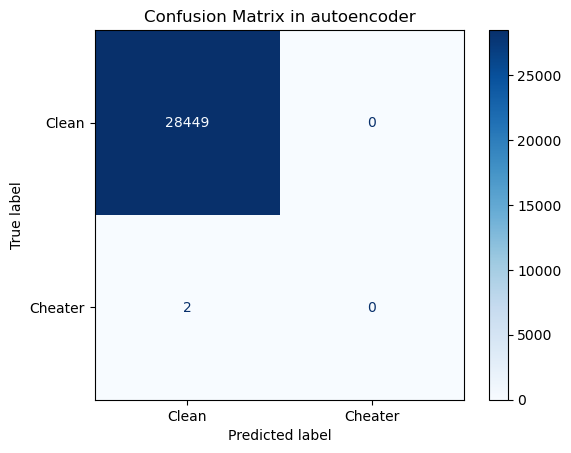

Количество записей в бине 2300-2350 = 629822


/opt/app-root/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Количество фрода в бине 2300-2350 = 0
Найдено аномалий: 0
fr:  0 0.0 0.0
norm:  3 4.763250569208443e-06 0.05454545454545454


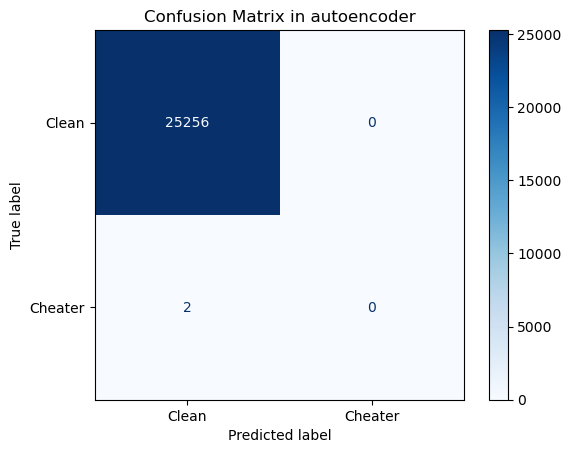

Количество записей в бине 2350-2400 = 677774
Количество фрода в бине 2350-2400 = 2
Найдено аномалий: 2
fr:  0 0.0 0.0
norm:  3 4.426267240310901e-06 0.043478260869565216


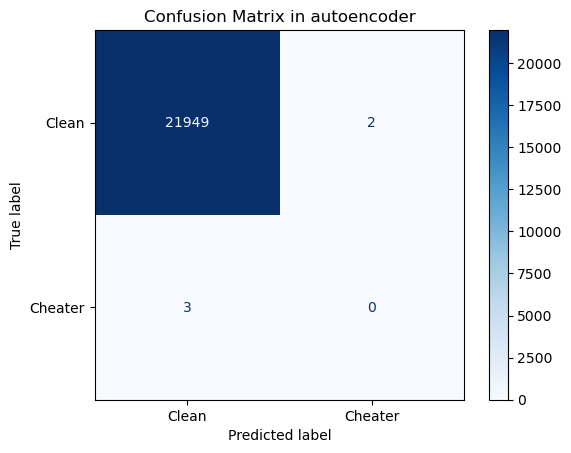

Количество записей в бине 2400-2450 = 717560
Количество фрода в бине 2400-2450 = 6
Найдено аномалий: 6
fr:  0 0.0 0.0
norm:  6 8.361740022353719e-06 0.06


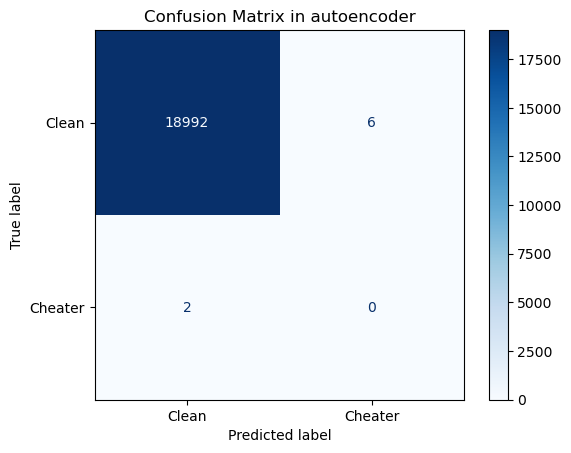

Количество записей в бине 2450-2500 = 733311


In [ ]:

for i in range(len(bins)-1):
    df_part = df[df['Elo'] > bins[i]]
    df_part = df_part[df_part['Elo'] < bins[i+1]]
    print(f'Количество записей в бине {bins[i]}-{bins[i+1]} = {len(df_part)}')
    
    scaler = StandardScaler()
    df_scal = scaler.fit_transform(df_part.iloc[:,3:])
    n = 20
    umap_model = umap.UMAP(n_neighbors=n, n_components=2, metric='euclidean', random_state=42)
    X_umap = umap_model.fit_transform(df_scal)
    clustering_model = DBSCAN()
    clusters = clustering_model.fit_predict(X_umap)
    df_part['clusters'] = clusters

    len_fr = len(df_part[df_part['clusters'] == -1])
    print(f'Количество фрода в бине {bins[i]}-{bins[i+1]} = {len_fr}')

    anomaly = df_part[df_part['clusters'] == -1]
    normal = df_part[df_part['clusters'] != -1]
    anomaly.to_csv(f'anom_games/dbscan/bin {bins[i]}-{bins[i+1]}')
    
    print(f'Найдено аномалий: {len(anomaly)}')
    mask = anomaly['Player'].isin(fraud) 
    df_fr = anomaly[mask]
    mask2 = df_part['Player'].isin(fraud) 
    df_fr2 = df_part[mask2]
    print('fraud: ', len(df_fr), len(df_fr)/max(1, len(anomaly)), len(df_fr)/max(1, len(df_fr2)))
    mask3 = normal['Player'].isin(good) 
    df_fr3 = normal[mask3]
    mask4 = df_part['Player'].isin(good) 
    df_fr4 = df_part[mask4]
    print('norm: ', len(df_fr3), len(df_fr3)/max(1, len(normal)), len(df_fr3)/max(1, len(df_fr2)))
    
    # diffs = anomaly.iloc[:,2:-1].mean(numeric_only=True) - normal.iloc[:,2:-1].mean(numeric_only=True)
    # diffs.sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title='Различия между признаками')
    # plt.xlabel("Разница средних значений")
    # plt.grid(True)
    # plt.tight_layout()
    # plt.show()
    
    df_part['is_anom'] = df_part['clusters'].apply(lambda x: 1 if x == -1 else 0)
    
    predicted = df_part.groupby('Player')['is_anom'].max().reset_index()
    predicted.columns = ['Player', 'predicted_cheater']
    predicted['true_cheater'] = predicted['Player'].apply(
        lambda x: 1 if x in fraud else 0
    )
    
    y_pred = predicted['predicted_cheater']
    y_true = predicted['true_cheater']
    
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Clean', 'Cheater'])
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix in autoencoder')
    plt.show()